# Exploratory Data Analysis

## About the Dataset
This notebook uses historical daily data from the S&P 500 index, collected from Yahoo Finance via the `yfinance` library. We’ll explore patterns in price, volume, and market behavior from 2010 to 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/sp500.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df = df[1:]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.56005859375,1133.8699951171875,1116.56005859375,1132.989990234375,1132.989990234375,3991400000
2010-01-05,1132.6600341796875,1136.6300048828125,1129.6600341796875,1136.52001953125,1136.52001953125,2491020000
2010-01-06,1135.7099609375,1139.18994140625,1133.949951171875,1137.1400146484375,1137.1400146484375,4972660000
2010-01-07,1136.27001953125,1142.4599609375,1131.3199462890625,1141.68994140625,1141.68994140625,5270680000
2010-01-08,1140.52001953125,1145.3900146484375,1136.219970703125,1144.97998046875,1144.97998046875,4389590000


## Initial Cleaning and Data Checks
We begin by loading the data, cleaning it, and ensuring types are correct. Then we confirm that the data is sorted by date and has no missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       3774 non-null   object
 1   High       3774 non-null   object
 2   Low        3774 non-null   object
 3   Close      3774 non-null   object
 4   Adj Close  3774 non-null   object
 5   Volume     3774 non-null   object
dtypes: object(6)
memory usage: 206.4+ KB


In [3]:
# Convert all price/volume columns to float
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.index.is_monotonic_increasing

True

## Check for missing values


In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Summary Statistics
This block summarizes the central tendency, spread, and shape of each feature’s distribution.

In [7]:
# Summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,2727.736940,2742.224616,2712.214531,2728.274880,2728.274880,3.938713e+09
std,1264.940853,1271.299419,1258.193109,1264.990492,1264.990492,9.513684e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,0.000000e+00
25%,1700.017487,1707.684998,1693.692535,1702.179962,1702.179962,3.374318e+09
50%,2431.929932,2441.444946,2420.329956,2432.114990,2432.114990,3.783425e+09
75%,3816.820007,3845.267517,3791.010010,3818.822571,3818.822571,4.301015e+09
max,6089.029785,6099.970215,6079.979980,6090.270020,6090.270020,1.061781e+10


In [8]:
# Check date range
df.index.min(), df.index.max()

(Timestamp('2010-01-04 00:00:00'), Timestamp('2024-12-31 00:00:00'))

# Plots

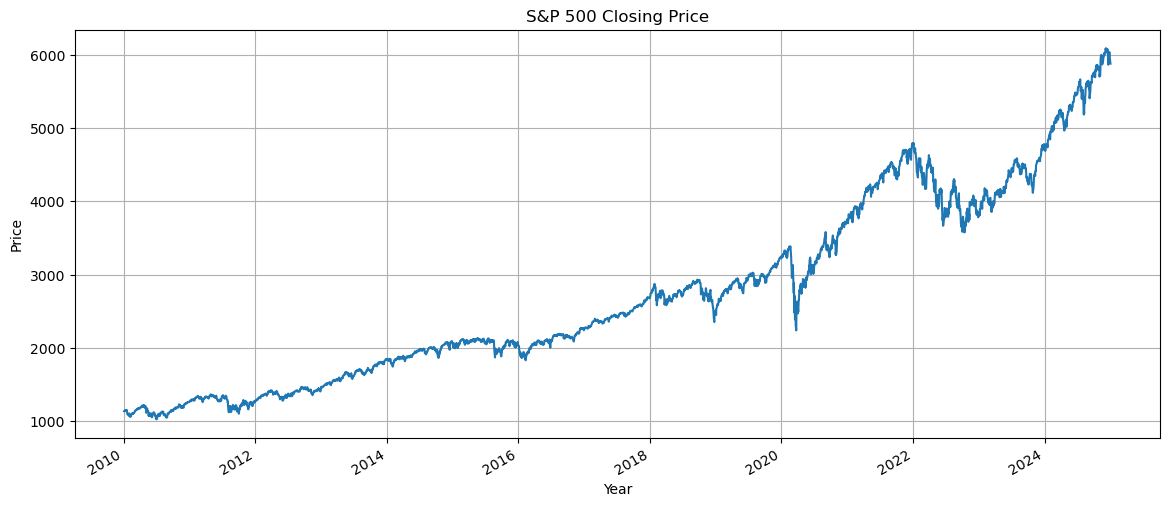

In [9]:
# Plot Closing Price Over Time
plt.figure(figsize=(14, 6))
df['Close'].plot(title='S&P 500 Closing Price')
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

## Daily Returns
We calculate the daily percentage return of the S&P 500 using the `Close` price and examine its distribution.

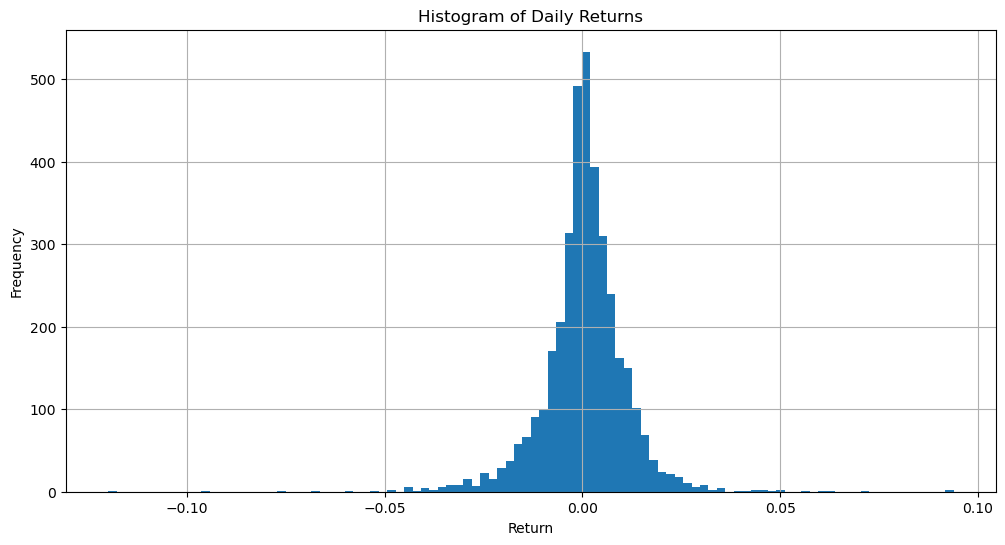

In [10]:
# Calculate daily return and plot histogram
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].hist(bins=100, figsize=(12,6))
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Rolling Volatility
Rolling volatility shows how the standard deviation of daily returns changes over time.

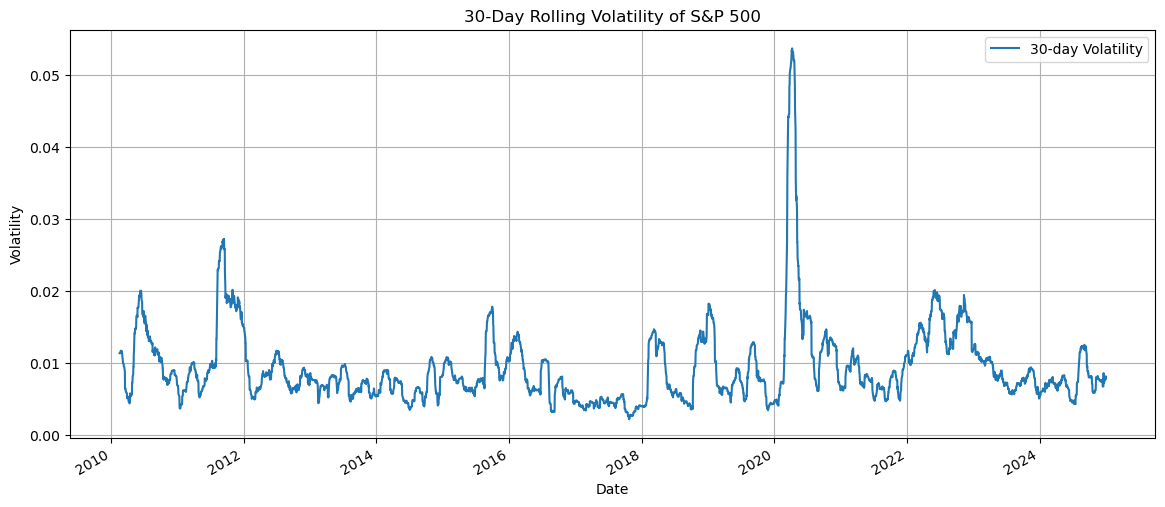

In [11]:
# 30-day rolling standard deviation
rolling_vol = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
rolling_vol.plot(label='30-day Volatility')
plt.title('30-Day Rolling Volatility of S&P 500')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()

## Rolling Moving Averages
We compute 50-day and 200-day moving averages to identify long-term market trends.

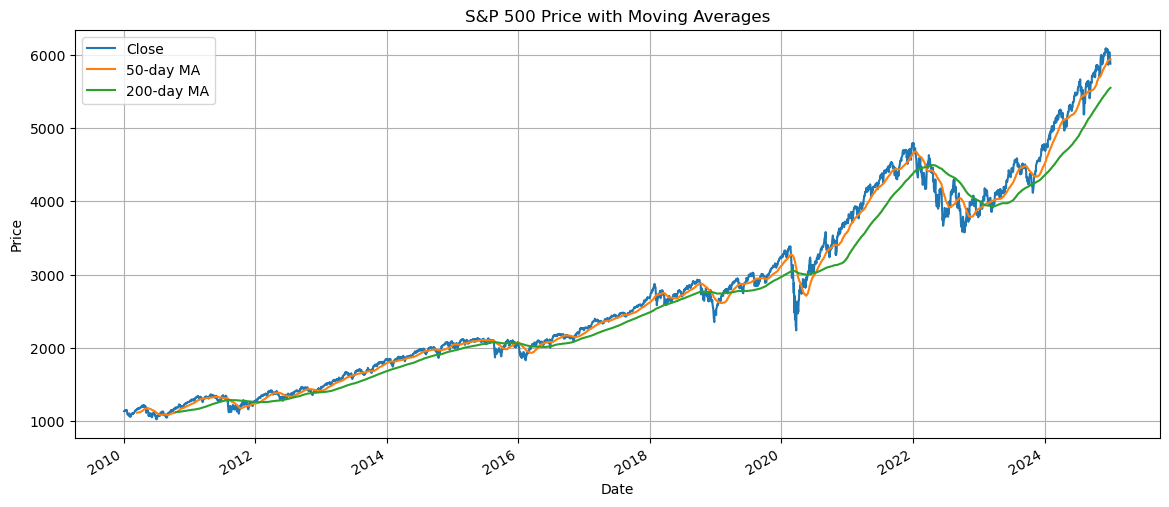

In [12]:
# Compute moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(14, 6))
df['Close'].plot(label='Close')
df['MA50'].plot(label='50-day MA')
df['MA200'].plot(label='200-day MA')
plt.title('S&P 500 Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

## Technical Indicators
Technical indicators help us capture price momentum, trend direction, and volatility. These are widely used by traders to make informed decisions. Below are some of the most common indicators:

- **RSI (Relative Strength Index):** Measures recent gains vs. losses over a 14-day window. Values >70 suggest overbought, <30 oversold.
- **MACD (Moving Average Convergence Divergence):** Compares short-term and long-term momentum via EMA crossovers.
- **Bollinger Bands:** Plots bands two standard deviations above and below a moving average.
- **Daily Return:** Percentage change in price from previous day (already added).


In [13]:
# RSI (Relative Strength Index)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Add RSI to DataFrame
df['RSI'] = compute_rsi(df['Close'])

In [14]:
# MACD (12-day EMA minus 26-day EMA)
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
# Signal line (9-day EMA of MACD)
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [15]:
# Bollinger Bands
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()
df['Bollinger Upper'] = rolling_mean + (2 * rolling_std)
df['Bollinger Lower'] = rolling_mean - (2 * rolling_std)

## Labeling Market Movement
To train a model, we need labeled data. We'll classify the next day's movement as:
- **1** if the closing price went up
- **0** if the price went down or stayed the same

This binary label helps us frame the problem as a classification task.

In [16]:
# Create binary label for next-day price movement
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df['Target'].value_counts()

Target
1    2055
0    1719
Name: count, dtype: int64

## 🧼 Why Are There Missing Values (NaNs) After Feature Engineering?

When calculating technical indicators like Moving Averages (MA), RSI, or MACD, it's **completely normal to encounter NaN values at the beginning of the dataset**.

This happens because these indicators rely on a **lookback window** — they need a minimum number of historical data points before they can return a result:

| Indicator       | Rows Needed |
|----------------|-------------|
| MA50            | 50 rows     |
| MA200           | 200 rows    |
| RSI (14)        | 14 rows     |
| MACD/Signal     | ~26+ rows   |
| Bollinger Bands | 20 rows     |

> For example, the 50-day moving average cannot be calculated until the 50th row — so rows 1 to 49 will be `NaN`.

These early NaNs should always be **dropped after feature engineering**. This is standard practice in financial modeling and avoids introducing noise or incorrect values.


In [23]:
# Drop rows with missing values caused by rolling indicators
print(f"Before dropping NaNs: {len(df)} rows")
df.dropna(inplace=True)
print(f"After dropping NaNs: {len(df)} rows")

Before dropping NaNs: 3774 rows
After dropping NaNs: 3575 rows


## Feature Selection and Normalization
Before feeding data into a machine learning model, we must:
1. Select relevant features (technical indicators)
2. Normalize them so all features contribute equally to model learning.

In [24]:
# Select features and target
features = ['RSI', 'MACD', 'Signal', 'Bollinger Upper', 'Bollinger Lower']
X = df[features].copy()
y = df['Target']

In [25]:
# Normalize features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  Train-Test Split
We split the dataset into training and testing sets to evaluate how the model performs on unseen data.

In [27]:
# Split data for modeling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False  # no shuffle to preserve time order
)

## Logistic Regression Model
We'll start with a simple and interpretable model: **Logistic Regression**. It predicts the probability that the market goes up (Target = 1).

In [29]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation Metrics
We’ll assess how well our model performs using accuracy, precision, recall, and a confusion matrix.

In [35]:
# Evaluate model performance
print("Accuracy:")
accuracy_score(y_test, y_pred)

Accuracy:


0.5202797202797202

In [41]:
from sklearn.metrics import classification_report

# Clean version with zero_division fix and direct print
report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.52      1.00      0.68       372

    accuracy                           0.52       715
   macro avg       0.26      0.50      0.34       715
weighted avg       0.27      0.52      0.36       715



In [37]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[  0 343]
 [  0 372]]


## Random Forest Classifier
Now we'll train a **Random Forest**, a powerful ensemble method that often outperforms simple models by reducing overfitting and handling feature interactions.

In [31]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## Random Forest Evaluation

In [32]:
# Evaluate Random Forest performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.4937062937062937

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.58      0.52       343
           1       0.52      0.42      0.46       372

    accuracy                           0.49       715
   macro avg       0.50      0.50      0.49       715
weighted avg       0.50      0.49      0.49       715


Confusion Matrix:
 [[198 145]
 [217 155]]


## Strategy Simulation
Let's simulate a trading strategy where we go 'long' (buy) when the model predicts an up day.

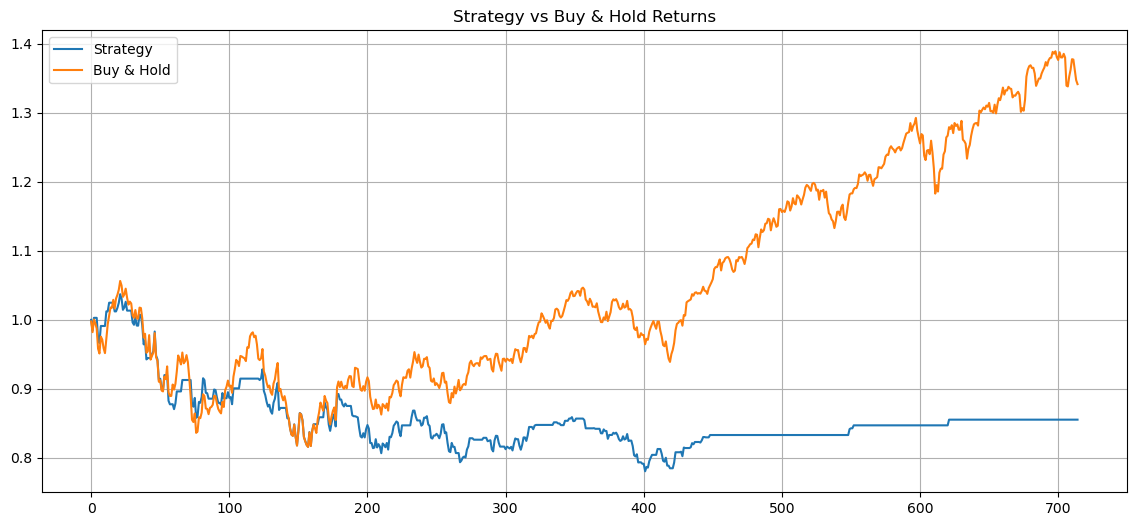

In [33]:
# Simulate strategy returns

returns = df['Daily Return'].iloc[-len(y_test):].reset_index(drop=True)
strategy_returns = returns * y_pred_rf

# Cumulative return
(1 + strategy_returns).cumprod().plot(figsize=(14, 6), label='Strategy')
(1 + returns).cumprod().plot(label='Buy & Hold')
plt.title('Strategy vs Buy & Hold Returns')
plt.legend()
plt.grid(True)
plt.show()

## Modular Pipeline with Project Modules
Now that our project is structured into modules, here’s how to use them in an end-to-end workflow.

In [34]:
# Import modules
from src.features import preprocess_features
from src.model import prepare_data, train_random_forest, evaluate_model
from src.strategy import simulate_strategy, plot_cumulative_returns
from src.backtest import calculate_sharpe_ratio, calculate_max_drawdown
from src.utils import get_feature_columns

# Load and preprocess data
df = preprocess_features("../data/sp500.csv")

# Prepare features
target_features = get_feature_columns()
X_train, X_test, y_train, y_test, _ = prepare_data(df, target_features)

# Train model
model = train_random_forest(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
evaluate_model(model, X_test, y_test)

ModuleNotFoundError: No module named 'src'

In [ ]:
# Strategy simulation and performance
strategy_returns = simulate_strategy(df, y_pred)
benchmark_returns = df['Daily Return'].iloc[-len(y_pred):].reset_index(drop=True)

# Plot performance
plot_cumulative_returns(strategy_returns, benchmark_returns)

In [ ]:
# Backtest metrics
sharpe = calculate_sharpe_ratio(strategy_returns)
drawdown = calculate_max_drawdown((1 + strategy_returns).cumprod())

print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {drawdown:.2%}")